# Kennicut-Schmidt relation: $\Sigma_{SFR}$ vs $\Sigma_{gas}$
2D hist of $\Sigma_{gas}$ and 2D hist of $\Sigma_{SFR}$ -> scatter plot of 2D hists.

In [1]:
# import minirats
import minirats.utils.py.readwrite.ramses_info as ri

# import ratatouille
from ratatouille import readNsave as ras
from ratatouille import plotutils as put

# imports others
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.facecolor']='w'
plt.rcParams['font.size'] = 8

In [3]:
genpath = '/mnt/lyoccf/scratch/mrey/outputs/2_G8/'
folder='1_base/' 
RamsesDir = genpath+folder
RamsesDir = '/home/max/PhD/Simus/Offline_temp/'
timestep  = 17

In [4]:
info = ri.rd_info(timestep,RamsesDir)
size_box_kpc = info['boxlen']

cen = size_box_kpc/2
center = [cen,cen,cen]

In [5]:
rad_kpc = 20
logscale = True
binsize_aim = 1.                    # [kpc]
lim_sfr = 100                       # [Myr]

# Read stars

In [6]:
star_mass,star_x,star_y,_,_,star_age,_,_,_,_, star_minit = ras.extract_stars(RamsesDir,timestep, saveinfile=False)
star_params = star_x,star_y,star_age,star_minit

# Read cells

In [7]:
# Cells data
rho,cell_dx,cell_pos,cell_l = ras.extract_cells(RamsesDir,timestep,['rho','cell_dx','cell_pos','cell_l'])

# Compute HR KS components

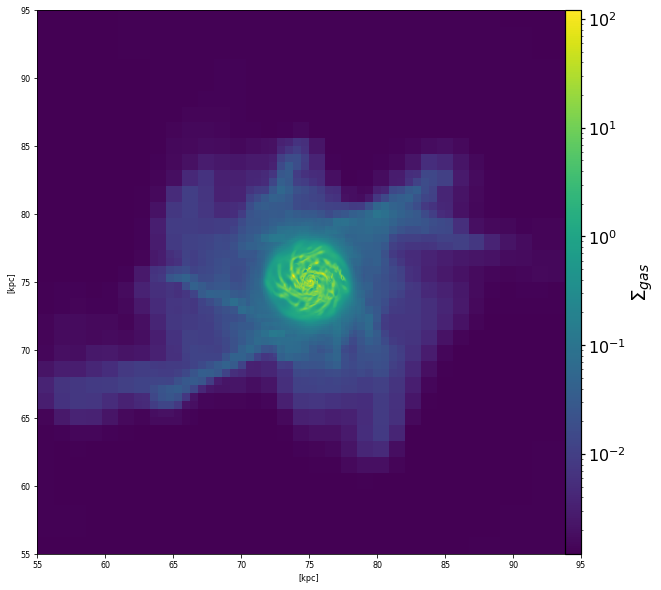

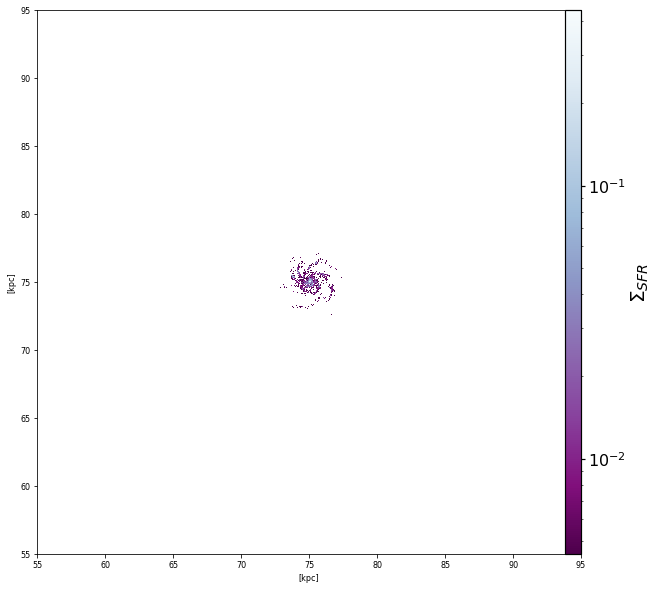

In [8]:
sig_gas_HR, nb_makemap_bins \
    = put.compute_sig_gas_HR(rho, center, rad_kpc, cell_pos, cell_l, info)
put.plot_sig_gas(sig_gas_HR, center, rad_kpc, remove_ticks=False)

sig_sfr_HR = put.compute_2Dsfr(star_age, star_minit, star_x, star_y, \
                               nb_makemap_bins, lim_sfr, center, rad_kpc)
put.plot_sig_sfr(sig_sfr_HR, center, rad_kpc, remove_ticks=False)

sig_gas_nr, sig_sfr_nr, sig_sfr_nr_fit, coef_nr \
    = put.mefit(sig_gas_HR, sig_sfr_HR, forlog=logscale)

# Compute KS components

Rebin v1

In [9]:
sig_gas_1, sig_sfr_1, sig_sfr1_fit, coef_1 = \
    put.KS(star_params, sig_gas_HR, nb_makemap_bins, rad_kpc, center, rebin='1', \
    lim_sfr=lim_sfr, binsize_aim=binsize_aim, bestfit=True, forlog=logscale, plot_gas=False, plot_sfr=False)

/!\/!\/!\ BEWARE: the radius considered has changed /!\/!\/!\ 
The size of a bin is now ~ 0.952 kpc.


Rebin v2

In [10]:
sig_gas_2, sig_sfr_2, sig_sfr2_fit, coef_2 = \
    put.KS(star_params, sig_gas_HR, nb_makemap_bins, rad_kpc, center, rebin='2', \
    lim_sfr=lim_sfr, binsize_aim=binsize_aim, bestfit=True, forlog=logscale, plot_gas=False, plot_sfr=False)

Rebin v3

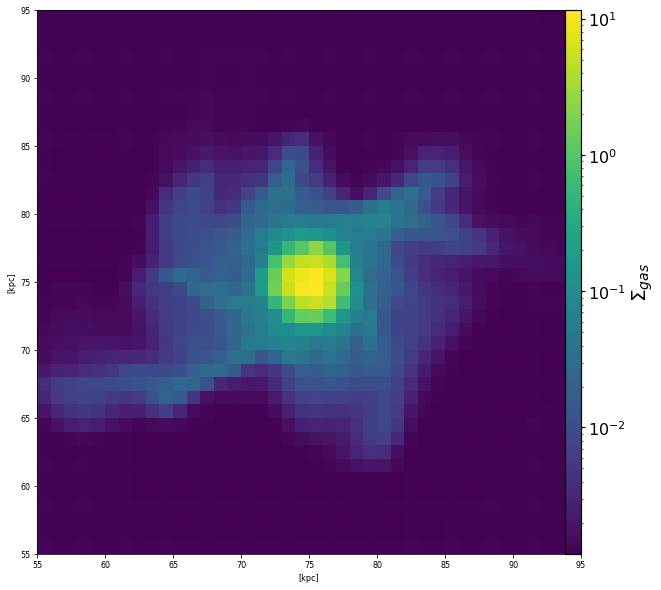

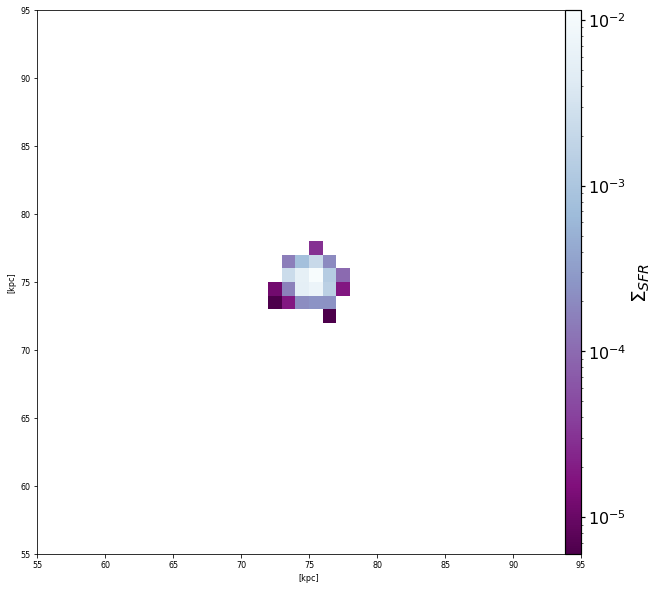

In [11]:
sig_gas_3, sig_sfr_3, sig_sfr3_fit, coef_3 = \
    put.KS(star_params, sig_gas_HR, nb_makemap_bins, rad_kpc, center, rebin='3', \
    lim_sfr=lim_sfr, binsize_aim=binsize_aim, bestfit=True, forlog=logscale, plot_gas=True, plot_sfr=True)

Rebin v4

The size of the bins is ~ 0.988 kpc


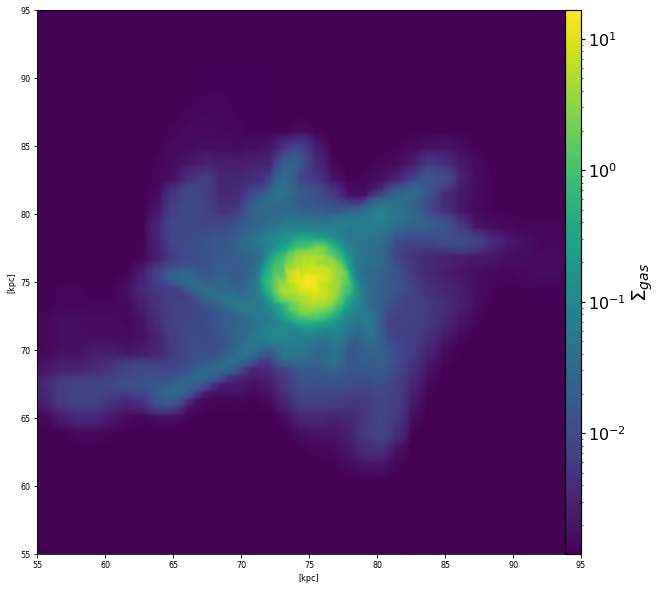

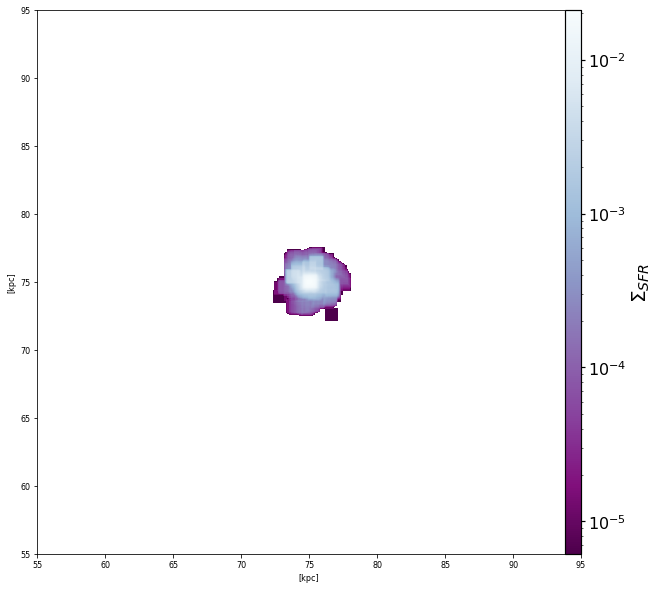

In [12]:
sig_gas_4, sig_sfr_4, sig_sfr4_fit, coef_4 = \
    put.KS(star_params, sig_gas_HR, nb_makemap_bins, rad_kpc, center, rebin='4', \
    lim_sfr=lim_sfr, binsize_aim=binsize_aim, bestfit=True, forlog=logscale, plot_gas=True, plot_sfr=True)

Rebin v4 + threshold

In [13]:
thresh = 5e-5
sig_gas4_red, sig_sfr4_red, sig_sfr4_fit_red, coef_4_red \
    = put.KS(star_params, sig_gas_HR, nb_makemap_bins, rad_kpc, center, rebin='4', \
             lim_sfr=lim_sfr, binsize_aim=binsize_aim, thresh=thresh, bestfit=True, \
             forlog=logscale, plot_gas=False, plot_sfr=False)

The size of the bins is ~ 0.988 kpc


# Marion

In [14]:
from ratatouille.Marion_stuff import file_utils as mar
nb_bins_Mar = rad_kpc/binsize_aim
mar.write_inoutflowsdat(RamsesDir,timestep,routine='annuli',nbins=40,rmax_annuli=10)
mar_sigma_gas,mar_sigma_sfr,_ = mar.read_inoutflowsdat(RamsesDir,timestep,routine='annuli')

$MINIRATS/utils/f90/standalone/ks_annuli  -dir /home/max/PhD/Simus/Offline_temp/ -inp 17 -out /home/max/PhD/Simus/Offline_temp/dat//inoutflows_annuli_00017.dat -rma 10 -nbn 40 -cdr 1


In [15]:
mar_gas, mar_sfr, mar_sfr_fit, coef_mar \
    = put.mefit(mar_sigma_gas,mar_sigma_sfr, forlog=logscale)

# Plot

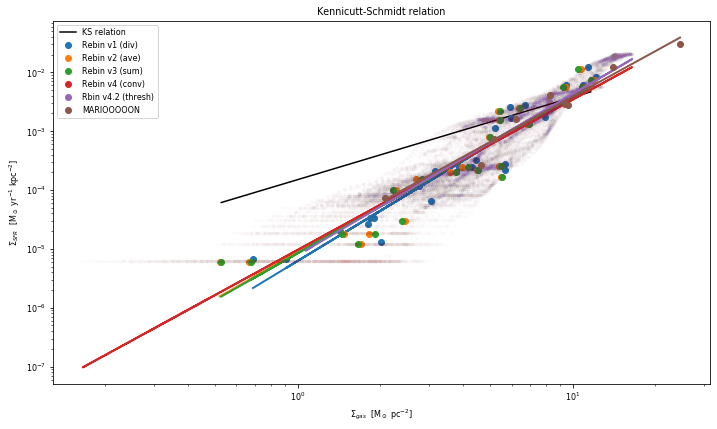

Eq raw data:     0.54 * Sig_gas + -2.60

Eq log scale:    1.4  * Sig_gas -  3.6 

Eq rebin v1:     2.83 * Sig_gas + -5.21
Eq rebin v2:     2.64 * Sig_gas + -5.06
Eq rebin v3:     2.65 * Sig_gas + -5.07
Eq rebin v4:     2.55 * Sig_gas + -5.02
v4 threshold:    2.74 * Sig_gas + -5.11

Eq Marion:       2.57 * Sig_gas + -4.98


In [16]:
#data = sig_gas_nr, sig_sfr_nr, sig_sfr_nr_fit, 'Not rebinned'
data1 = sig_gas_1, sig_sfr_1, sig_sfr1_fit, 'Rebin v1 (div)'
data2 = sig_gas_2, sig_sfr_2, sig_sfr2_fit, 'Rebin v2 (ave)'
data3 = sig_gas_3, sig_sfr_3, sig_sfr3_fit, 'Rebin v3 (sum)'
data4 = sig_gas_4, sig_sfr_4, sig_sfr4_fit, 'Rebin v4 (conv)'
data5 = sig_gas4_red, sig_sfr4_red, sig_sfr4_fit_red, 'Rbin v4.2 (thresh)'
data6 = mar_gas, mar_sfr, mar_sfr_fit, 'MARIOOOOON'
datas = [data1, data2, data3, data4, data5, data6]

lims = sig_gas_3.min(),sig_gas_3.max()
put.plot_KS(datas, lims, IMF='Chabrier', logscale=logscale, plot_data=True)

print('Eq raw data:     {:.2f} * Sig_gas + {:.2f}\n'.format(coef_nr[0],coef_nr[1]))
print('Eq log scale:    1.4  * Sig_gas -  3.6 \n')
print('Eq rebin v1:     {:.2f} * Sig_gas + {:.2f}'.format(coef_1[0],coef_1[1]))
print('Eq rebin v2:     {:.2f} * Sig_gas + {:.2f}'.format(coef_2[0],coef_2[1]))
print('Eq rebin v3:     {:.2f} * Sig_gas + {:.2f}'.format(coef_3[0],coef_3[1]))
print('Eq rebin v4:     {:.2f} * Sig_gas + {:.2f}'.format(coef_4[0],coef_4[1]))
print('v4 threshold:    {:.2f} * Sig_gas + {:.2f}\n'.format(coef_4_red[0],coef_4_red[1]))

print('Eq Marion:       {:.2f} * Sig_gas + {:.2f}'.format(coef_mar[0],coef_mar[1]))